In [1]:
import os
import pandas as pd
from pyspark.ml.feature import StringIndexer, OneHotEncoder
import plotly.express as px
import json

os.chdir('../')


In [2]:

from Utils.SparkSessionManager import SparkSessionManager
from Service.DataReader import DataReader
from Service.VMAnalyzer import VMAnalyzer

In [3]:
spark = SparkSessionManager.create_session()
dt_reader = DataReader(spark)
with open('settings.json', 'r') as file:
    data = json.load(file)

local_settings = data['Prod']
filepath = local_settings['filepath']
input_file = local_settings['input']

csv_file, vmSchema = dt_reader.read_data(filepath, input_file)
dt_analyzer = VMAnalyzer(spark, csv_file, vmSchema)


In [4]:
dataFrame = dt_analyzer.get_df()
processed_df = dt_analyzer.pre_processing_pipeline()

In [5]:
columns = ["baseScore", "impactScore", "exploitabilityScore"]
dt_analyzer.calculate_range(dataFrame, columns)

+-------------+-------------+---------------+---------------+-----------------------+-----------------------+
|min_baseScore|max_baseScore|min_impactScore|max_impactScore|min_exploitabilityScore|max_exploitabilityScore|
+-------------+-------------+---------------+---------------+-----------------------+-----------------------+
|         NULL|         NULL|            0.5|            3.9|                   NULL|                   NULL|
+-------------+-------------+---------------+---------------+-----------------------+-----------------------+



+----+----------+
|Year|Base Score|
+----+----------+
| 1.4|      NULL|
| 2.5|      NULL|
| 2.7|      NULL|
| 3.6|      NULL|
| 3.7|      NULL|
| 4.2|      NULL|
| 5.2|      NULL|
| 5.9|      NULL|
|   6|      NULL|
+----+----------+



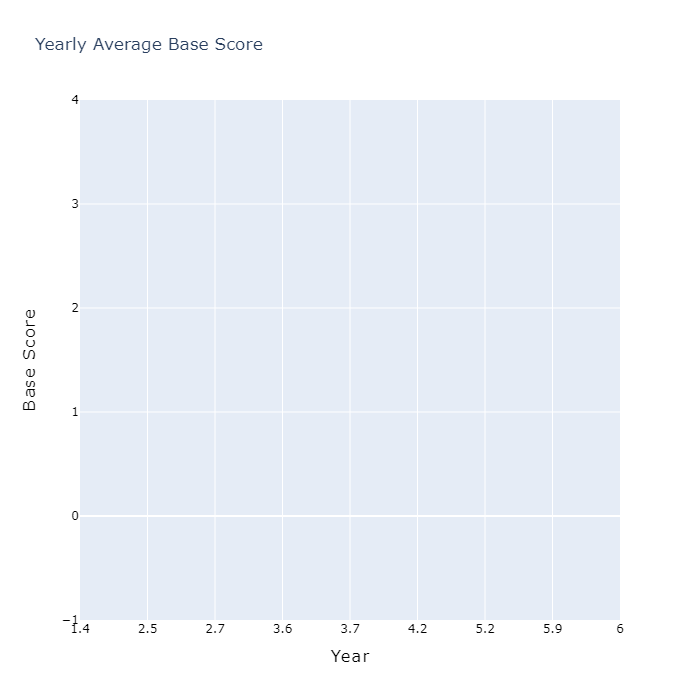

In [6]:
mean_df_base_score = dt_analyzer.calculate_mean_category(dataFrame, "year", "baseScore", "Year", "Base Score", True)
options = {
    'xAxisLabel': "<span style='letter-spacing: 1.3px;'>Year</span>",
    'yAxisLabel': "<span style='letter-spacing: 1.3px;'>Base Score</span>",
    'width': 700,
    'height': 700,
    'title': "Yearly Average Base Score",
    'format': "png",
    'font_size': 16,
    'font_color': "black",
    'value_color': "black",
    'value_size': 12
}
dt_analyzer.show_line_chart(mean_df_base_score, "Year", "Base Score", options)

+----------------+----------+
|   Attack Vector|Base Score|
+----------------+----------+
|           LOCAL|      NULL|
|         NETWORK|      NULL|
|        PHYSICAL|      NULL|
|ADJACENT NETWORK|      NULL|
+----------------+----------+

+----------------+----------+
|   Attack Vector|Base Score|
+----------------+----------+
|           LOCAL|      NULL|
|         NETWORK|      NULL|
|        PHYSICAL|      NULL|
|ADJACENT NETWORK|      NULL|
+----------------+----------+



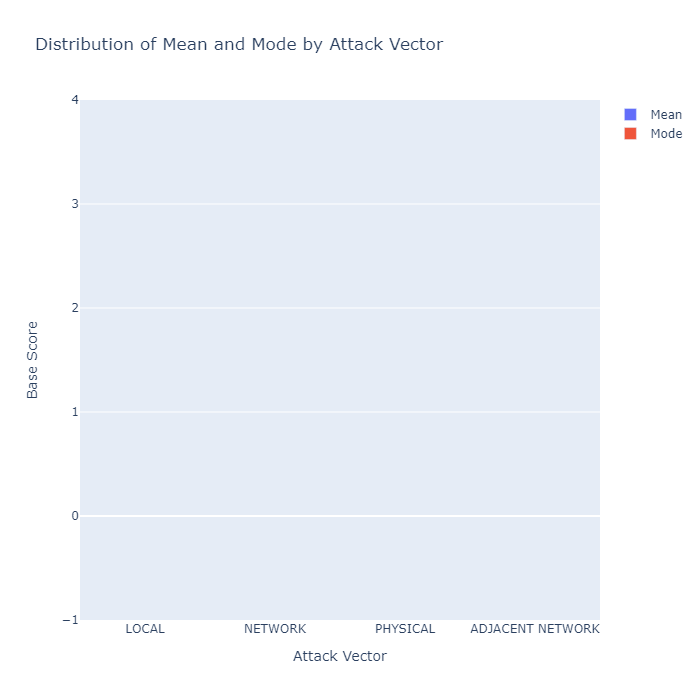

In [7]:

mode_df_base_score = dt_analyzer.calculate_mode_category(dataFrame, "attackVector", "baseScore", "Attack Vector", "Base Score")
mean_df_base_score = dt_analyzer.calculate_mean_category(dataFrame, "attackVector", "baseScore", "Attack Vector", "Base Score")
options = {
    'xAxisLabel': "<span style='letter-spacing: 1.3px;'>Attack Vector</span>",
    'yAxisLabel': "<span style='letter-spacing: 1.3px;'>Base Score</span>",
    'width': 700,
    'height': 700,
    'title': "Distribution of Mean and Mode by Attack Vector",
    'format': "png",
    'font_size': 16,
    'font_color': "black",
    'value_color': "black",
    'value_size': 12
}
dt_analyzer.show_go_bar_chart_mean_mode(mode_df_base_score, mean_df_base_score, "Attack Vector", "Base Score", options)



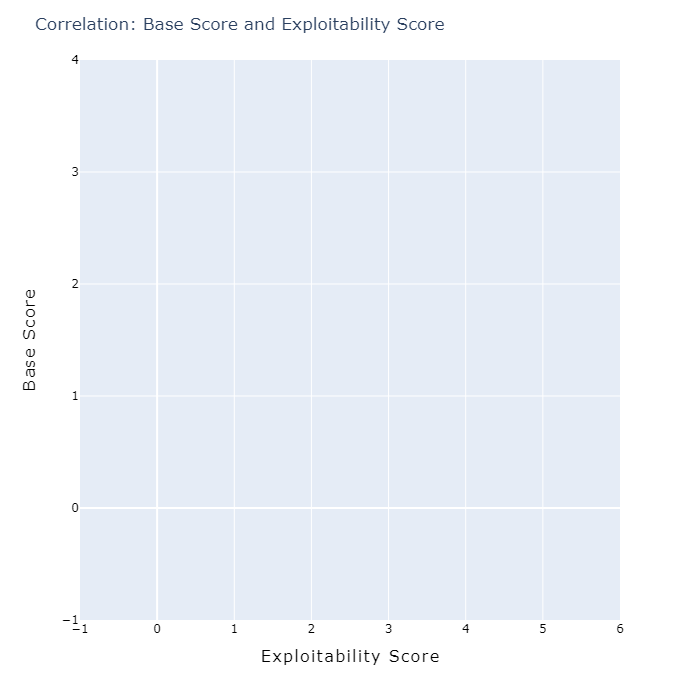

In [8]:
options = {
    'xAxis': "<span style='letter-spacing: 1.3px;'>Exploitability Score</span>",
    'yAxis': "<span style='letter-spacing: 1.3px;'>Base Score</span>",
    'width': 700,
    'height': 700,
    'title': "Correlation: Base Score and Exploitability Score",
    'format': "png",
    'font_size': 16,
    'font_color': "black",
}
dt_analyzer.show_correlation_scatter_plot(processed_df, "exploitabilityScore", "baseScore", options)

+----------------+------------+-----+
|    attackVector|baseSeverity|count|
+----------------+------------+-----+
|           LOCAL|         7.3|    1|
|           LOCAL|         7.8|   15|
|ADJACENT_NETWORK|         8.1|    1|
|           LOCAL|         2.3|    1|
|           LOCAL|         8.8|    1|
|        PHYSICAL|         4.6|   11|
|         NETWORK|         5.9|    2|
|        PHYSICAL|         7.1|    1|
|           LOCAL|         5.2|    1|
|           LOCAL|         5.5|    8|
|         NETWORK|         9.8|    4|
|           LOCAL|         8.2|    1|
|         NETWORK|         8.2|    1|
|        PHYSICAL|         2.4|    2|
|ADJACENT_NETWORK|         6.5|    9|
|ADJACENT_NETWORK|         6.3|    1|
|         NETWORK|         7.5|    4|
|        PHYSICAL|         7.4|    1|
|         NETWORK|         6.1|    3|
|        PHYSICAL|         6.6|    1|
+----------------+------------+-----+
only showing top 20 rows



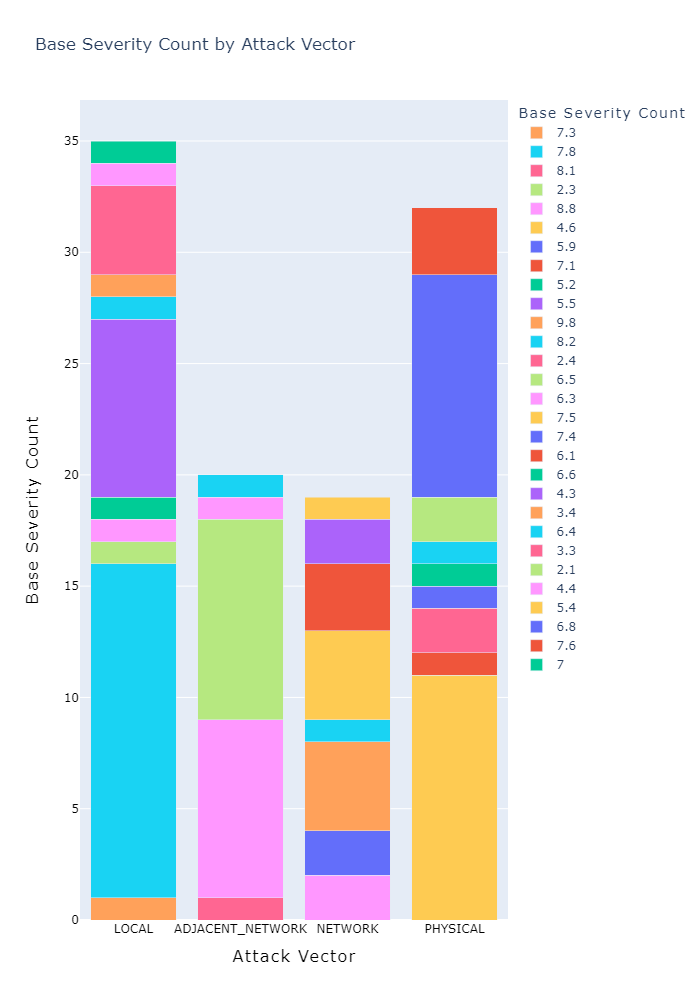

In [9]:
options = {
    'xAxisLabel': "<span style='letter-spacing: 1.3px;'>Attack Vector</span>",
    'yAxisLabel': "<span style='letter-spacing: 1.3px;'>Base Severity Count</span>",
    'width': 700,
    'height': 1000,
    'title': "Base Severity Count by Attack Vector",
    'format': "png",
    'font_size': 16,
    'font_color': "black",
    'value_color': "black",
    'value_size': 12
}
dt_analyzer.show_correlation_stacked_bar_chart(processed_df, "attackVector", "baseSeverity", options)

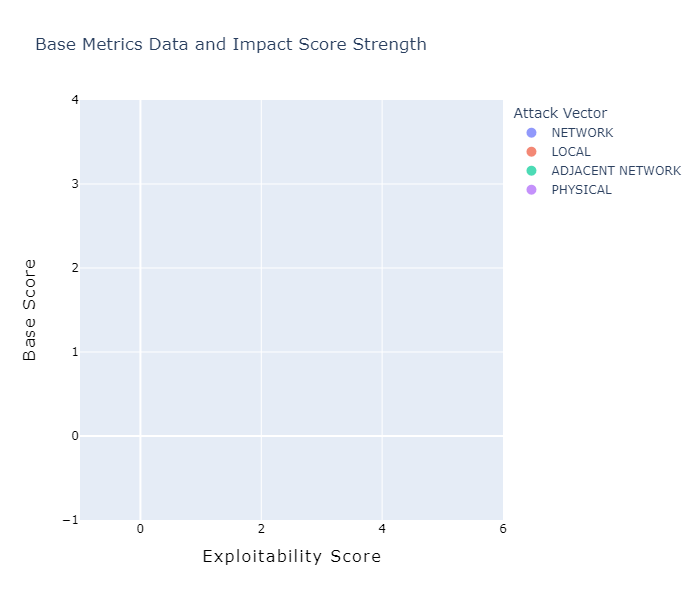

In [10]:
options = {
    'xAxisLabel': "<span style='letter-spacing: 1.3px;'>Exploitability Score</span>",
    'yAxisLabel': "<span style='letter-spacing: 1.3px;'>Base Score</span>",
    'width': 700,
    'height': 600,
    'title': "Base Metrics Data and Impact Score Strength",
    'format': "png",
    'font_size': 16,
    'font_color': "black",
    'value_color': "black",
    'value_size': 12,
     'size_col': "impactScore",
     'color_col': "attackVector",
     'key_label': "Attack Vector"
}
dt_analyzer.show_bubble_chart(
   processed_df, 
  "exploitabilityScore",
  "baseScore", 
   options
  )

-0.12165299798314035
Correlation matrix:
                        Confidentiality Impact  Integrity Impact  \
Confidentiality Impact                1.000000         -0.121653   
Integrity Impact                     -0.121653          1.000000   
Availability Impact                  -0.079212          0.712837   

                        Availability Impact  
Confidentiality Impact            -0.079212  
Integrity Impact                   0.712837  
Availability Impact                1.000000  


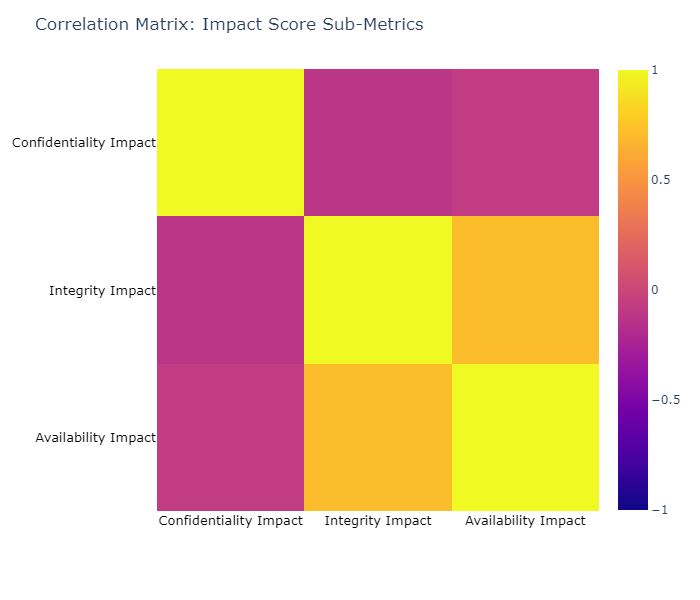

In [11]:
dt_analyzer.check_correlation(processed_df, "ConfidentialityImpactNumeric", "IntegrityImpactNumeric")
column_display_info = [
    {"column_name": "ConfidentialityImpactNumeric", "display_name": "Confidentiality Impact"},
    {"column_name": "IntegrityImpactNumeric", "display_name": "Integrity Impact"},
    {"column_name": "AvailabilityImpactNumeric", "display_name": "Availability Impact"}
]
correlation_df = dt_analyzer.calculate_correlation(processed_df, column_display_info)
options = {
    'width': 700,
    'height': 600,
    'title': "Correlation Matrix: Impact Score Sub-Metrics",
    'format': "png",
    'font_size': 16,
    'font_color': "black",
    'value_color': "black",
    'value_size': 13,
}
dt_analyzer.show_heatmap(correlation_df, options)

In [12]:
columns_clustering = ['baseScore', 'exploitabilityScore', 'impactScore']
dt_analyzer.clustering_pipeline(processed_df, columns_clustering)

An error occurred while performing clustering: An error occurred while calling o533.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 54.0 failed 1 times, most recent failure: Lost task 0.0 in stage 54.0 (TID 40) (DESKTOP-43PVK7D.mshome.net executor driver): org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (`VectorAssembler$$Lambda$4026/0x000000010179e840`: (struct<baseScore_double_VectorAssembler_526f3962ce88:double,exploitabilityScore_double_VectorAssembler_526f3962ce88:double,impactScore_double_VectorAssembler_526f3962ce88:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:198)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedC